## Problema 1

Se tienen en un Laboratorio varias fuentes patrón de distintos radionucleidos, utilizadas para calibrar los sistemas de detección. Estas fuentes fueron entregadas al Laboratorio con los siguientes datos:

- Fecha de calibración: 1/3/2015
- Forma física: sólida
- Actividad de cada fuente a la fecha de entrega: 10 mCi
- Fuentes: Cs-137 / Co-57 / Co-60 / Am-241 / Eu-152 / I-131 / Fe-59 / Na-22

Se pide:

### a. Mencionar las emisiones de los radionucleidos que le correspondan (ver formulario)

**¿qué formulario?**

![Cs-137](imagenes/cs-137-b.png)

El Cs-137 emite partículas beta (y fotones). La emision principal es el $\beta^{-1}$ por su frecuencia de emisión (0.946) y el fotón de 661.6 keV (**que no figura en la tabla**). **¿Qué diferencia hay entre la parte a y b?**

### b. Realizar el diagrama de niveles de energía con las principales emisiones, señalando el núcleo madre e hija(s), el valor energético de cada nivel, el tipo de emisiones y su probabilidad, en todos los casos. Justificar el criterio de elección de las emisiones que se consignan en los diagramas.

- Núcleo madre: Cs-137. Valor energético: 661.6 keV. (**¿qué valor energético corresponde al Cs-137 antes de emitir la partícula beta?**)
- Núcleo hijo: Ba-137 (estable). **Valor energético: ¿?**

Emisiones:

- partículas beta de 173.4 keV. Probabilidad de emisión: 0.946 (94.6%)
- partículas beta de 424.6 keV. Probabilidad de emisión: 0.054 (5.4%)

**Me parece que la consigna podría decir**:

*"Revisar las tablas y/o diagramas con las emisiones del RN (**¿sólo del libro?**). Identificar las más importantes (**¿máximo = 5?**). Realizar con ellas un diagrama de niveles de energía con las principales emisiones, señalando el núcleo madre e hija(s), el valor energético de cada nivel, el tipo de emisiones y su probabilidad, en todos los casos. Justificar el criterio de elección de las emisiones que se consignan en los diagramas."*

### c. ¿Cuál será la actividad total del conjunto de fuentes el 1/3/2020?

In [2]:
import numpy as np

from pint import UnitRegistry
u = UnitRegistry()
# u.load_definitions('./mis-defs.txt') 

import matplotlib.pyplot as plt

# %matplotlib inline

In [11]:
def a(a0, semiperiodo, t):
    '''Cálculo del decaimiento de la actividad'''
    lmbda = np.log(2)/semiperiodo
    return a0 * np.exp(- lmbda * t)

In [14]:
A0_Cs137 = 10 * u('mCi')
t = 5 * u('years')
tmedio_Cs137 = 30 * u('years')
afinal_Cs137 = a(A0_Cs137, tmedio_Cs137, t)
print(afinal_Cs137.round(2))

8.91 millicurie


### d. Realice una gráfica donde pueda verse la evolución temporal de cada fuente, y la actividad total, entre el 1/3/2015 y el 1/3/2020

El Cs en 5 años no decae mucho. Para ver la exponencial hay que mirar un período de tiempo como mínimo de 3 o 4 semiperíodos...

/home/diego/.pyenv/versions/3.6.5/envs/jupyter/lib/python3.6/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


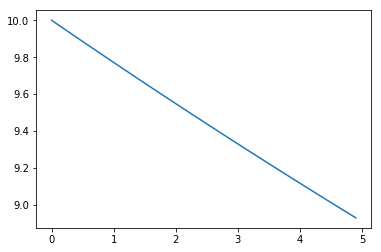

In [19]:
# Datos
t = np.arange(0.0, 5.0, 0.1) * u('years')
s = a(A0_Cs137, tmedio_Cs137, t)

fig, ax = plt.subplots()
ax.plot(t, s)

# ax.set(xlabel='time (s)', ylabel='actividad (Ci)', title='Gráfica sencilla')
# ax.grid()

plt.show()

### Se tiene una serie de materiales absorbentes, y se desea estudiar la interacción de estos materiales con algunos radionucleidos. Hay tres láminas de cada material, de tres espesores diferentes: 1 mm, 5 mm y 20 mm. Los materiales son: cartón / cobre / aluminio / acrílico / plomo / INa(Tl)

### e. Calcule la intensidad que llega al punto P, para cada combinación pedida material / espesor (x) / fuente / distancia (d):

![Cs-137](imagenes/fuente-absorbente.png)

In [30]:
def I(I0, mu, x):
    '''Cálculo de la intensidad cuando se interpone un absorbente'''
    return I0 * np.exp(-mu * x)

### Combinación 1

- Fuente: Cs-137 (E = 661 keV)
- Absorbente: Plomo.
- d = 10 cm.

Datos del coeficiente de atenuación másico extraidos de https://www.nist.gov/pml/x-ray-mass-attenuation-coefficients.
    
| Energía $MeV$ | Coeficiente $cm^2/g$ |
| --- | --- |
| 6.00000E-01 | 1.248E-01 |
| 8.00000E-01 | 8.870E-02 |

In [32]:
def y(x1, y1, x2, y2, x):
    '''Interpolación lineal'''
    k = y2 - y1 / (x2 - x1)
    return y1 + k * (x-x1)

### Cálculo del coeficiente de atenuación másico (mediante interpolación lineal)

In [33]:
x1 = 6e-1
y1 = 1.248e-1

x2 = 8e-1
y2 = 8.870e-2

x = 6.61e-1
coef1 = y(x1, y1, x2, y2, x)
coef1

0.09214669999999997

Falta calcular la intensidad inicial (I0)